In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA/data_final.csv")
label = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA/label.csv")

Mounted at /content/drive


In [ ]:
data.drop(["chlorpropamide", "tolbutamide", "acarbose", "miglitol", "troglitazone", "tolazamide","glyburide-metformin","glipizide-metformin"], axis = 1, inplace = True)
data.shape
data.to_csv("/content/drive/My Drive/Colab Notebooks/BA/data_final.csv", index = False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_label = data.columns[0:]
threshold = 0.01
x = data.values
x = x[:, importances > threshold]

x.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


(98052, 23)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.2, random_state = 0)
y_train[:1]

,readmitted
62541,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.1, random_state = 0)
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(x_train, y_train)
print(X_resampled_nm1.shape)
print(y_resampled_nm1.shape)

(29961, 23)
(29961, 1)


In [ ]:
print(x_test.shape)

(9806, 23)


In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0)#default RF
X_resampled, y_resampled = iht.fit_resample(x, label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.1, random_state = 0)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)
print(X_resampled.shape)
print(y_resampled.shape)
print(x_test.shape)

(141315, 23)
(141315, 1)
(9806, 23)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=400).fit(x_train, y_train)#class_weight="balanced"
lr_pred = lr.predict(x_test)
lr_pred.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(19611,)

In [ ]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, roc_curve, f1_score, precision_score, recall_score, roc_auc_score, auc
# Kappa系数是基于混淆矩阵的计算得到的模型评价参数(越接近 1 越好)
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(lr_pred).reshape(-1,1))
print("LR kappa is %d: ", kappa)
from sklearn import metrics
from sklearn.metrics import f1_score
lr_f1micro = f1_score(y_test,lr_pred,average='micro')
lr_f1macro = f1_score(y_test,lr_pred,average='macro')

lr_weighted = f1_score(y_test,lr_pred,average='weighted')
print("F1 LR micro is %d: ", lr_f1micro)
print("F1 LR macro is %d: ", lr_f1macro)
print("F1 LR weighted is %d: ", lr_weighted)
from sklearn import metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy is %d: ", lr_accuracy)

lr_pmicro = precision_score(y_test,lr_pred,average='micro')
lr_pmacro = precision_score(y_test,lr_pred,average='macro')
print("precision LR micro is %d: ", lr_pmicro)
print("precision LR macro is %d: ", lr_pmacro)

lr_rcmicro = recall_score(y_test,lr_pred,average='micro')
lr_rcmacro = recall_score(y_test,lr_pred,average='macro')
print("recall LR micro is %d: ", lr_rcmicro)
print("recall LR macro is %d: ", lr_rcmacro)

lr_prob = lr.predict_proba(x_test)
lr_auc_macro = roc_auc_score(y_test,lr_prob,average='macro', multi_class = 'ovr')
lr_auc_weighted = roc_auc_score(y_test,lr_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",lr_auc_macro)
print("auc_weighted: %d", lr_auc_weighted)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_pred, pos_label=2)
metrics.auc(fpr, tpr)


LR kappa is %d:  0.12427845894062706
F1 LR micro is %d:  0.5637142420070369
F1 LR macro is %d:  0.3465237759571442
F1 LR weighted is %d:  0.48804043351217136
Accuracy is %d:  0.5637142420070369
precision LR micro is %d:  0.5637142420070369
precision LR macro is %d:  0.4987839814000585
recall LR micro is %d:  0.5637142420070369
recall LR macro is %d:  0.3817211923177392
auc_macro: %d 0.6107812841594956
auc_weighted: %d 0.6178314849875971


0.4434300826615817

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_resampled, y_resampled)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'softmax',  # 目标函数
    'num_class':3,
    #'class_weight': 'balanced',
    #'metric': {'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.1,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval, early_stopping_rounds=10)
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)


[1]	valid_0's multi_logloss: 1.07697
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.05896
[3]	valid_0's multi_logloss: 1.04136
[4]	valid_0's multi_logloss: 1.02672
[5]	valid_0's multi_logloss: 1.01362
[6]	valid_0's multi_logloss: 1.00218
[7]	valid_0's multi_logloss: 0.991345
[8]	valid_0's multi_logloss: 0.981581
[9]	valid_0's multi_logloss: 0.973041
[10]	valid_0's multi_logloss: 0.965271
[11]	valid_0's multi_logloss: 0.957971
[12]	valid_0's multi_logloss: 0.951714
[13]	valid_0's multi_logloss: 0.9465
[14]	valid_0's multi_logloss: 0.941116
[15]	valid_0's multi_logloss: 0.936471
[16]	valid_0's multi_logloss: 0.932132
[17]	valid_0's multi_logloss: 0.928182
[18]	valid_0's multi_logloss: 0.924506
[19]	valid_0's multi_logloss: 0.921342
[20]	valid_0's multi_logloss: 0.917919
[21]	valid_0's multi_logloss: 0.915193
[22]	valid_0's multi_logloss: 0.912702
[23]	valid_0's multi_logloss: 0.910416
[24]	valid_0's multi_logloss: 0.90832
[25]	valid_0's multi

In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, roc_curve, f1_score, roc_auc_score, auc
lgbm_pred = [np.argmax(line) for line in y_pred]
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(lgbm_pred).reshape(-1,1))
print("lightgbm kappa is %d: ", kappa)
lgbm_micro = f1_score(y_test,lgbm_pred,average='micro')
lgbm_macro = f1_score(y_test,lgbm_pred,average='macro')
lgbm_weighted = f1_score(y_test,lgbm_pred,average='weighted')
print("lgbm micro is %d: ", lgbm_micro)
print("lgbm macro is %d: ", lgbm_macro)
print("lgbm weighted is %d: ", lgbm_weighted)
from sklearn import metrics
accuracy = accuracy_score(y_test, lgbm_pred)
print("Accuracy is %d: ", accuracy)
fpr, tpr, thresholds = roc_curve(y_test, lgbm_pred, pos_label=2)
lg_auc_macro = roc_auc_score(y_test,y_pred,average='macro', multi_class = 'ovr')
lg_auc_weighted = roc_auc_score(y_test,y_pred,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",lg_auc_macro)
print("auc_weighted: %d", lg_auc_weighted)
print(fpr,tpr)

lightgbm kappa is %d:  0.20871056279234612
lgbm micro is %d:  0.5909647154803181
lgbm macro is %d:  0.41104135543321935
lgbm weighted is %d:  0.546354830310283
Accuracy is %d:  0.5909647154803181
auc_macro: %d 0.6791434527605175
auc_weighted: %d 0.6864948986315326
[0.         0.00813567 0.75719033 1.        ] [0.         0.04355885 0.63577386 1.        ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#y_pred = [np.argmax(line) for line in y_pred]
from sklearn.metrics import cohen_kappa_score,  precision_score, recall_score, roc_auc_score
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(forest_pred).reshape(-1,1))
print("RF kappa is %d: ", kappa)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest_pred, pos_label=2)
metrics.auc(fpr, tpr)
from sklearn.metrics import f1_score
rf_f1micro = f1_score(y_test,forest_pred,average='micro')
rf_f1macro = f1_score(y_test,forest_pred,average='macro')
print("RF f1-micro is %d: ", rf_f1micro)
print("RF f1-macro is %d: ", rf_f1macro)

rf_pmicro = precision_score(y_test,forest_pred,average='micro')
rf_pmacro = precision_score(y_test,forest_pred,average='macro')
print("RF precision-micro is %d: ", rf_pmicro)
print("RF precision-macro is %d: ", rf_pmacro)

rf_rcmicro = recall_score(y_test,forest_pred,average='micro')
rf_rcmacro = recall_score(y_test,forest_pred,average='macro')
print("RF recall-micro is %d: ", rf_rcmicro)
print("RF recall-macro is %d: ", rf_rcmacro)

forest_pred_prob = forest.predict_proba(x_test)
rf_auc_macro = roc_auc_score(y_test,forest_pred_prob,average='macro', multi_class = 'ovr')
rf_auc_weighted = roc_auc_score(y_test,forest_pred_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",rf_auc_macro)
print("auc_weighted: %d", rf_auc_weighted)
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest_pred, pos_label=2)
metrics.auc(fpr, tpr)

RF kappa is %d:  0.18053552183467625
RF f1-micro is %d:  0.5750344194584672
RF f1-macro is %d:  0.3879484996895565
RF precision-micro is %d:  0.5750344194584672
RF precision-macro is %d:  0.5139724138631356
RF recall-micro is %d:  0.5750344194584672
RF recall-macro is %d:  0.40755227306731334
auc_macro: %d 0.6546591563347759
auc_weighted: %d 0.6629637291592918


0.440113219999368

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=324,silent=True,objective='multi:softmax')
model.fit(X_resampled, y_resampled)
# 对测试集进行预测
xgb_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(xgb_pred).reshape(-1,1))
print("XGB kappa is %d: ", kappa)

xgb_f1micro = f1_score(y_test,xgb_pred,average='micro')
xgb_f1macro = f1_score(y_test,xgb_pred,average='macro')
print("XGBoost f1-micro is %d: ", xgb_f1micro)
print("XGBoost f1-macro is %d: ", xgb_f1macro)

xgb_pmicro = precision_score(y_test,xgb_pred,average='micro')
xgb_pmacro = precision_score(y_test,xgb_pred,average='macro')
print("XGBoost precision-micro is %d: ", xgb_pmicro)
print("XGBoost precision-macro is %d: ", xgb_pmacro)

xgb_rcmicro = recall_score(y_test,xgb_pred,average='micro')
xgb_rcmacro = recall_score(y_test,xgb_pred,average='macro')
print("XGBoost recall-micro is %d: ", xgb_rcmicro)
print("XGBoost recall-macro is %d: ", xgb_rcmacro)

xgb_pred_prob = model.predict_proba(x_test)
xg_auc_macro = roc_auc_score(y_test,xgb_pred_prob,average='macro', multi_class = 'ovr')
xg_auc_weighted = roc_auc_score(y_test,xgb_pred_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",xg_auc_macro)
print("auc_weighted: %d", xg_auc_weighted)


fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred, pos_label=2)
metrics.auc(fpr, tpr)

XGB kappa is %d:  0.21120559314217147
XGBoost f1-micro is %d:  0.5904548235774016
XGBoost f1-macro is %d:  0.41278994125790097
XGBoost precision-micro is %d:  0.5904548235774016
XGBoost precision-macro is %d:  0.5029251140336947
XGBoost recall-micro is %d:  0.5904548235774016
XGBoost recall-macro is %d:  0.4239151382725462
auc_macro: %d 0.6801095003537134
auc_weighted: %d 0.6886404903068877


0.4526236208551582

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score,  precision_score, recall_score, roc_auc_score
from sklearn import metrics
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0).fit(x_train, y_train)
gbdt_pred = gbdt.predict(x_test)
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(gbdt_pred).reshape(-1,1))
print("GBDT kappa is %d: ", kappa)
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbdt_pred, pos_label=2)
metrics.auc(fpr, tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBDT kappa is %d:  0.20584820395456394


0.44392303723423265

In [ ]:
from sklearn.metrics import f1_score
gbdt_f1micro = f1_score(y_test,gbdt_pred,average='micro')
gbdt_f1macro = f1_score(y_test,gbdt_pred,average='macro')
print("GBDT f1 micro is %d: ", gbdt_f1micro)
print("GBDT f1 macro is %d: ", gbdt_f1macro)

gbdt_pmicro = precision_score(y_test,gbdt_pred,average='micro')
gbdt_pmacro = precision_score(y_test,gbdt_pred,average='macro')
print("GBDT f1 micro is %d: ", gbdt_pmicro)
print("GBDT f1 macro is %d: ", gbdt_pmacro)

gbdt_rcmicro = recall_score(y_test,gbdt_pred,average='micro')
gbdt_rcmacro = recall_score(y_test,gbdt_pred,average='macro')
print("GBDT f1 micro is %d: ", gbdt_rcmicro)
print("GBDT f1 macro is %d: ", gbdt_rcmacro)

gbdt_pred_prob = gbdt.predict_proba(x_test)
gb_auc_macro = roc_auc_score(y_test,gbdt_pred_prob,average='macro', multi_class = 'ovr')
gb_auc_weighted = roc_auc_score(y_test,gbdt_pred_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",gb_auc_macro)
print("auc_weighted: %d", gb_auc_weighted)


GBDT f1 micro is %d:  0.5887512110550202
GBDT f1 macro is %d:  0.40482056255549437
GBDT f1 micro is %d:  0.5887512110550202
GBDT f1 macro is %d:  0.531042085471615
GBDT f1 micro is %d:  0.5887512110550202
GBDT f1 macro is %d:  0.4202473462151391
auc_macro: %d 0.6811384386911431
auc_weighted: %d 0.6865449739533124


In [ ]:
import numpy as np
#from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(x_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWar

AttributeError: ignored

In [ ]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 5.7844614 ,  7.28705926,  9.37901883, 11.72811742, 14.0374732 ,
         16.31858482, 18.6533927 ]),
  'mean_score_time': array([0.00158815, 0.00144477, 0.00127268, 0.00096889, 0.00096412,
         0.00102487, 0.00145473]),
  'mean_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'rank_test_score': array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
  'split0_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, n

In [ ]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_ gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWar

AttributeError: ignored

In [ ]:
gsearch2.cv_results_ ,gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([10.58567748,  8.20143204,  8.16189241,  8.08117571, 10.85536938,
         10.47141194, 10.3604207 , 10.42051802, 13.03299947, 12.7504518 ,
         12.67562037, 12.51538663, 15.9707067 , 14.98759561, 14.68973947,
         14.36740632, 18.66086273, 17.22305694, 16.75335402, 16.17130637,
         21.51641641, 19.20142303, 18.06094618, 17.63846884]),
  'mean_score_time': array([0.00172162, 0.00115666, 0.00147662, 0.00129948, 0.00147319,
         0.00129809, 0.00125222, 0.00102897, 0.00121808, 0.00102768,
         0.00100408, 0.00103145, 0.00094914, 0.0014009 , 0.00138488,
         0.00143805, 0.00145855, 0.00143814, 0.00147204, 0.00139956,
         0.00099816, 0.00156283, 0.00115633, 0.00097456]),
  'mean_test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'param_max_depth': masked_array(data=[3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7, 9, 9, 9, 9, 11, 11,
               

In [ ]:
param_test3 = {'min_samples_split':range(800,1900,200), 'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(x_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWar

({'mean_fit_time': array([14.06017795, 12.5407763 , 12.34258218, 12.40383863, 12.13727903,
         12.06079712, 12.51760836, 12.39497652, 12.14028444, 12.22028136,
         12.11095829, 12.1372489 , 12.4691215 , 12.27150674, 12.09084892,
         12.12282944, 12.09767761, 12.10656271, 12.31287498, 12.29213963,
         12.36285462, 12.35607314, 12.04642353, 12.09117961, 12.3346384 ,
         12.21190133, 12.28732486, 12.77763643, 12.49314046, 12.43765063]),
  'mean_score_time': array([0.00143347, 0.00124407, 0.00150218, 0.00123906, 0.00107532,
         0.00131311, 0.00099626, 0.00113497, 0.00116401, 0.00133681,
         0.00108237, 0.00102272, 0.00157733, 0.00122948, 0.00089278,
         0.00131478, 0.00133681, 0.00105114, 0.00108905, 0.00098081,
         0.0009531 , 0.00120516, 0.0009861 , 0.00095568, 0.00120411,
         0.0009625 , 0.0013536 , 0.00109282, 0.00096412, 0.0009882 ]),
  'mean_test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         

In [ ]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=3, min_samples_leaf =60, 
               min_samples_split =100, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(x_train, y_train)
y_pred = gbm1.predict(x_test)
y_predprob = gbm1.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_1 = roc_auc_score(y_test,y_predprob,average='macro', multi_class = 'ovr')
print("auc_macro_1: %d",gbdt_auc_macro_1)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5667
auc_macro_1: %d 0.6519717860719313


In [ ]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(x_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWar

({'mean_fit_time': array([4.16171703, 3.91143675, 4.37399125, 4.81120691, 5.46483293,
         5.622892  , 6.25841804]),
  'mean_score_time': array([0.001443  , 0.00135303, 0.00147099, 0.00101418, 0.0009707 ,
         0.00093904, 0.00129404]),
  'mean_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15},
   {'max_features': 17},
   {'max_features': 19}],
  'rank_test_score': array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
  'split0_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, na

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, max_features=7, random_state=10), 
                       param_grid = param_test5, scoring='roc_auc', cv=5)
gsearch5.fit(x_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWar

({'mean_fit_time': array([4.03790307, 3.37503858, 3.46309385, 3.5432579 , 3.84497323,
         3.79045291]),
  'mean_score_time': array([0.00162368, 0.00104899, 0.00101161, 0.0010551 , 0.00100398,
         0.00096369]),
  'mean_test_score': array([nan, nan, nan, nan, nan, nan]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'rank_test_score': array([1, 2, 3, 4, 5, 6], dtype=int32),
  'split0_test_score': array([nan, nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan, nan]),
  'std_

In [ ]:
gbm2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=20,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, max_features=7, subsample=0.6, random_state=10)
gbm2.fit(x_train, y_train)
y_pred = gbm2.predict(x_test)
y_predprob2 = gbm1.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_2 = roc_auc_score(y_test,y_predprob2,average='macro', multi_class = 'ovr')
print("auc_macro_2: %d",gbdt_auc_macro_2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5541
auc_macro_2: %d 0.6519717860719313


In [ ]:
gbm3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=200,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, max_features=7, subsample=0.6, random_state=10)
gbm3.fit(x_train, y_train)
y_pred = gbm3.predict(x_test)
y_predprob3 = gbm3.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_3 = roc_auc_score(y_test,y_predprob3,average='macro', multi_class = 'ovr')
print("auc_macro_3: %d",gbdt_auc_macro_3)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5551
auc_macro_3: %d 0.6504126094333472


In [ ]:
gbm4 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, max_features=7, subsample=0.6, random_state=10)
gbm4.fit(x_train, y_train)
y_pred = gbm4.predict(x_test)
y_predprob4 = gbm4.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_4 = roc_auc_score(y_test,y_predprob4,average='macro', multi_class = 'ovr')
print("auc_macro_4: %d",gbdt_auc_macro_4)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5738
auc_macro_4: %d 0.6549888745055217


In [ ]:
gbm5 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,max_depth=3, min_samples_leaf =60, 
               min_samples_split =800, max_features=7, subsample=0.6, random_state=10)
gbm5.fit(x_train, y_train)
y_pred = gbm5.predict(x_test)
y_predprob5 = gbm5.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_5 = roc_auc_score(y_test,y_predprob5,average='macro', multi_class = 'ovr')
print("auc_macro_5: %d",gbdt_auc_macro_5)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5828
auc_macro_5: %d 0.6719919476542242


In [ ]:
gbm6 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=800, max_depth=6, min_samples_leaf=50, 
               min_samples_split=800, max_features=8, subsample=0.7, random_state=10)
gbm6.fit(x_train, y_train)
y_pred = gbm6.predict(x_test)
y_predprob6 = gbm6.predict_proba(x_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, y_pred))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
gbdt_auc_macro_6 = roc_auc_score(y_test,y_predprob6,average='macro', multi_class = 'ovr')
print("auc_macro_6: %d",gbdt_auc_macro_6)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.5934
auc_macro_6: %d 0.6842797204731349


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh_pred = neigh.predict(x_test)
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(neigh_pred).reshape(-1,1))
print("KNN kappa is %d: ", kappa)
fpr, tpr, thresholds = metrics.roc_curve(y_test, neigh_pred, pos_label=2)
metrics.auc(fpr, tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN kappa is %d:  0.04945240997901801


0.4838585350919316

In [ ]:
neigh_f1micro = f1_score(y_test,neigh_pred,average='micro')
neigh_f1macro = f1_score(y_test,neigh_pred,average='macro')
print("KNN f1 micro is %d: ", neigh_f1micro)
print("KNN f1 macro is %d: ", neigh_f1macro)

neigh_pmicro = precision_score(y_test,neigh_pred,average='micro')
neigh_pmacro = precision_score(y_test,neigh_pred,average='macro')
print("KNN precision micro is %d: ", neigh_pmicro)
print("KNN precision macro is %d: ", neigh_pmacro)

neigh_rcmicro = recall_score(y_test,neigh_pred,average='micro')
neigh_rcmacro = recall_score(y_test,neigh_pred,average='macro')
print("KNN f1 micro is %d: ", neigh_rcmicro)
print("KNN f1 macro is %d: ", neigh_rcmacro)

neigh_pred_prob = neigh.predict_proba(x_test)
nn_auc_macro = roc_auc_score(y_test,neigh_pred_prob,average='macro', multi_class = 'ovr')
nn_auc_weighted = roc_auc_score(y_test,neigh_pred_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",nn_auc_macro)
print("auc_weighted: %d", nn_auc_weighted)

KNN f1 micro is %d:  0.4688185202182449
KNN f1 macro is %d:  0.35125338011708235
KNN precision micro is %d:  0.4688185202182449
KNN precision macro is %d:  0.36266893487037555
KNN f1 micro is %d:  0.4688185202182449
KNN f1 macro is %d:  0.35692248914472674
auc_macro: %d 0.5301811011897749
auc_weighted: %d 0.5331174363407986


In [ ]:
from sklearn import svm
svm = svm.SVC(probability=True)
svm.fit(X_resampled, y_resampled)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_pred = svm.predict(x_test)
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(svm_pred).reshape(-1,1))
print("SVM kappa is %d: ", kappa)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred, pos_label=2)
metrics.auc(fpr, tpr)

SVM kappa is %d:  0.03243161223333402


0.5053740094577214

In [ ]:
from sklearn.metrics import f1_score
svm_f1micro = f1_score(y_test,svm_pred,average='micro')
svm_f1macro = f1_score(y_test,svm_pred,average='macro')
print("SVM f1 micro is %d: ", svm_f1micro)
print("SVM f1 macro is %d: ", svm_f1macro)

svm_pmicro = precision_score(y_test,svm_pred,average='micro')
svm_pmacro = precision_score(y_test,svm_pred,average='macro')
print("SVM precision micro is %d: ", svm_pmicro)
print("SVM precision macro is %d: ", svm_pmacro)

svm_rcmicro = recall_score(y_test,svm_pred,average='micro')
svm_rcmacro = recall_score(y_test,svm_pred,average='macro')
print("SVM micro is %d: ", svm_rcmicro)
print("SVM macro is %d: ", svm_rcmacro)

svm_pred_prob = svm.predict_proba(x_test)
svm_auc_macro = roc_auc_score(y_test,svm_pred_prob,average='macro', multi_class = 'ovr')
svm_auc_weighted = roc_auc_score(y_test,svm_pred_prob,average='weighted', multi_class = 'ovr')
print("auc_macro: %d",svm_auc_macro)
print("auc_weighted: %d", svm_auc_weighted)

NameError: ignored

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

#roc random forest
#forest_pred_prob = forest.predict_proba(x_test)
# roc curve for classes
fpr_rf = {}
tpr_rf = {}
thresh_rf ={}
roc_auc_rf = {}
for i in range(3):    
    fpr_rf[i], tpr_rf[i], thresh_rf[i] = roc_curve(y_test, forest_pred_prob[:,i], pos_label=i)
    roc_auc_rf[i] = auc(fpr_rf[i],tpr_rf[i])
# First aggregate all false positive rates
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(3):
    wg_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
# Finally average it and compute AUC
fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = wg_tpr_rf/3
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])


#GBDT
#y_prob_gbdt = gbdt_0.predict_proba(x_test)
# roc curve for classes
fpr_gbdt = {}
tpr_gbdt = {}
thresh_gbdt ={}
roc_auc_gbdt = {}
for i in range(3):    
    fpr_gbdt[i], tpr_gbdt[i], thresh_gbdt[i] = roc_curve(y_test, gbdt_pred_prob[:,i], pos_label=i)
    roc_auc_gbdt[i] = auc(fpr_gbdt[i],tpr_gbdt[i])
# First aggregate all false positive rates
all_fpr_gbdt = np.unique(np.concatenate([fpr_gbdt[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_gbdt = np.zeros_like(all_fpr_gbdt)
for i in range(3):
    wg_tpr_gbdt += interp(all_fpr_gbdt, fpr_gbdt[i], tpr_gbdt[i])
# Finally average it and compute AUC
fpr_gbdt["macro"] = all_fpr_gbdt
tpr_gbdt["macro"] = wg_tpr_gbdt/3
roc_auc_gbdt["macro"] = auc(fpr_gbdt["macro"], tpr_gbdt["macro"])


#xgb
#y_prob_xgb = xgb_0.predict_proba(x_test)
# roc curve for classes
'''
fpr_xgb = {}
tpr_xgb = {}
thresh_xgb ={}
roc_auc_xgb = {}
for i in range(3):    
    fpr_xgb[i], tpr_xgb[i], thresh_xgb[i] = roc_curve(y_test, xgb_pred_prob[:,i], pos_label=i)
    roc_auc_xgb[i] = auc(fpr_xgb[i],tpr_xgb[i])
# First aggregate all false positive rates
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(3)]))
wg_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(3):
    wg_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
# Finally average it and compute AUC
fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = wg_tpr_xgb/3
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])
'''
#lr
#y_prob_lr = lr_0.predict_proba(x_test)
# roc curve for classes
fpr_lr = {}
tpr_lr = {}
thresh_lr ={}
roc_auc_lr = {}
for i in range(3):    
    fpr_lr[i], tpr_lr[i], thresh_lr[i] = roc_curve(y_test, lr_prob[:,i], pos_label=i)
    roc_auc_lr[i] = auc(fpr_lr[i],tpr_lr[i])
# First aggregate all false positive rates
all_fpr_lr = np.unique(np.concatenate([fpr_lr[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_lr = np.zeros_like(all_fpr_lr)
for i in range(3):
    wg_tpr_lr += interp(all_fpr_lr, fpr_lr[i], tpr_lr[i])
# Finally average it and compute AUC
fpr_lr["macro"] = all_fpr_lr
tpr_lr["macro"] = wg_tpr_lr/3
roc_auc_lr["macro"] = auc(fpr_lr["macro"], tpr_lr["macro"])
'''
#lightgbm
# roc curve for classes
fpr_lgbm = {}
tpr_lgbm = {}
thresh_lgbm ={}
roc_auc_lgbm = {}
gbm_pre_prob = gbm.predict(x_test, num_iteration=gbm.best_iteration)
for i in range(3):    
    fpr_lgbm[i], tpr_lgbm[i], thresh_lgbm[i] = roc_curve(y_test, gbm_pre_prob[:,i], pos_label=i)
    roc_auc_lgbm[i] = auc(fpr_lgbm[i],tpr_lgbm[i])
# First aggregate all false positive rates
all_fpr_lgbm = np.unique(np.concatenate([fpr_lgbm[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_lgbm = np.zeros_like(all_fpr_lgbm)
for i in range(3):
    wg_tpr_lgbm += interp(all_fpr_lgbm, fpr_lgbm[i], tpr_lgbm[i])
# Finally average it and compute AUC
fpr_lgbm["macro"] = all_fpr_lgbm
tpr_lgbm["macro"] = wg_tpr_lgbm/3
roc_auc_lgbm["macro"] = auc(fpr_lgbm["macro"], tpr_lgbm["macro"])
'''
#KNN
# roc curve for classes
fpr_knn = {}
tpr_knn = {}
thresh_knn ={}
roc_auc_knn = {}
#gbm_pre_prob = gbm.predict(x_test, num_iteration=gbm.best_iteration)
for i in range(3):    
    fpr_knn[i], tpr_knn[i], thresh_knn[i] = roc_curve(y_test, neigh_pred_prob[:,i], pos_label=i)
    roc_auc_knn[i] = auc(fpr_knn[i],tpr_knn[i])
# First aggregate all false positive rates
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(3):
    wg_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
# Finally average it and compute AUC
fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = wg_tpr_knn/3
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])
'''
#svm
# roc curve for classes
fpr_svm = {}
tpr_svm = {}
thresh_svm ={}
roc_auc_svm = {}
#gbm_pre_prob = gbm.predict(x_test, num_iteration=gbm.best_iteration)
for i in range(3):    
    fpr_svm[i], tpr_svm[i], thresh_svm[i] = roc_curve(y_test, svm_pred_prob[:,i], pos_label=i)
    roc_auc_svm[i] = auc(fpr_svm[i],tpr_svm[i])
# First aggregate all false positive rates
all_fpr_svm = np.unique(np.concatenate([fpr_svm[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
wg_tpr_svm = np.zeros_like(all_fpr_svm)
for i in range(3):
    wg_tpr_svm += interp(all_fpr_svm, fpr_svm[i], tpr_svm[i])
# Finally average it and compute AUC
fpr_svm["macro"] = all_fpr_svm
tpr_svm["macro"] = wg_tpr_svm/3
roc_auc_svm["macro"] = auc(fpr_svm["macro"], tpr_svm["macro"])
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


'\n#svm\n# roc curve for classes\nfpr_svm = {}\ntpr_svm = {}\nthresh_svm ={}\nroc_auc_svm = {}\n#gbm_pre_prob = gbm.predict(x_test, num_iteration=gbm.best_iteration)\nfor i in range(3):    \n    fpr_svm[i], tpr_svm[i], thresh_svm[i] = roc_curve(y_test, svm_pred_prob[:,i], pos_label=i)\n    roc_auc_svm[i] = auc(fpr_svm[i],tpr_svm[i])\n# First aggregate all false positive rates\nall_fpr_svm = np.unique(np.concatenate([fpr_svm[i] for i in range(3)]))\n# Then interpolate all ROC curves at this points\nwg_tpr_svm = np.zeros_like(all_fpr_svm)\nfor i in range(3):\n    wg_tpr_svm += interp(all_fpr_svm, fpr_svm[i], tpr_svm[i])\n# Finally average it and compute AUC\nfpr_svm["macro"] = all_fpr_svm\ntpr_svm["macro"] = wg_tpr_svm/3\nroc_auc_svm["macro"] = auc(fpr_svm["macro"], tpr_svm["macro"])\n'

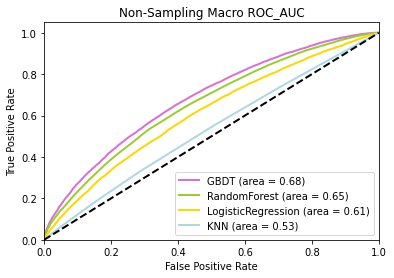

In [ ]:
# Plot all ROC curves
lw=2
plt.figure()

plt.plot(fpr_gbdt["macro"], tpr_gbdt["macro"],
         label='GBDT (area = {0:0.2f})'
               ''.format(roc_auc_gbdt["macro"]),
         color='orchid',linewidth=2)
'''
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='lightseagreen',linewidth=2)
'''
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='yellowgreen',linewidth=2)
'''
plt.plot(fpr_lgbm["macro"], tpr_lgbm["macro"],
         label='LightGBM (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='coral', linewidth=2)
'''
plt.plot(fpr_lr["macro"], tpr_lr["macro"],
         label='LogisticRegression (area = {0:0.2f})'
               ''.format(roc_auc_lr["macro"]),
         color='gold',linewidth=2)

plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='KNN (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lightblue',linewidth=2)
'''
plt.plot(fpr_svm["macro"], tpr_svm["macro"],
         label='SVM (area = {0:0.2f})'
               ''.format(roc_auc_svm["macro"]),
         color='red',linewidth=2)
'''
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Sampling Macro ROC_AUC')
plt.legend(loc="best")
plt.show()